Method of False Position
-------------------------------
The normal depth $y$ of the flow in an open channel and the width $w$ is related to the flow rate $Q$, the channel slope $s$ and the Manning friction coefficient $n$ by the equations:


$$y\left( \frac{wy}{w+2y} \right) ^{2/3}=c=\frac{nQ}{w\sqrt{s}}$$ 


- Determine $y$ using the false position method for the data: 


$$w=15m; Q=20m^3/s; n=0.015; s=0.001$$


- Make a graphic to choose the initial interval
- Using a relative error of 0.00002%

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

We must solve the equation when $y\left( \frac{wy}{w+2y} \right) ^{2/3}=c=\frac{nQ}{w\sqrt{s}}$ or well, we can write like: 

$$y\left( \frac{wy}{w+2y} \right) ^{2/3}-\frac{nQ}{w\sqrt{s}}=0$$

Well, since they are both the minuend and the subtrahend c, we can say with certainty that the subtraction will be equal to zero.

To solve the equation, we will take:

$$Y=f(y)=y\left( \frac{wy}{w+2y} \right) ^{2/3}-\frac{nQ}{w\sqrt{s}}$$

so the solution to the equation will be the values of $y$ for which the function $f(y)$ is zero.

Substituting the values $w, n, Q, s$ we simplify the function to the following:

$$f(y)=y \cdot \left( \frac{15y}{15+2y}\right)^{2/3}- \sqrt{0.4}$$

We define the function:

In [3]:
functionY = lambda y: y*(((15*y/(15+2*y))**2)**(1/3))-np.sqrt(0.4)

We graph the function to select the interval in which a root can be found and thus start the false position method

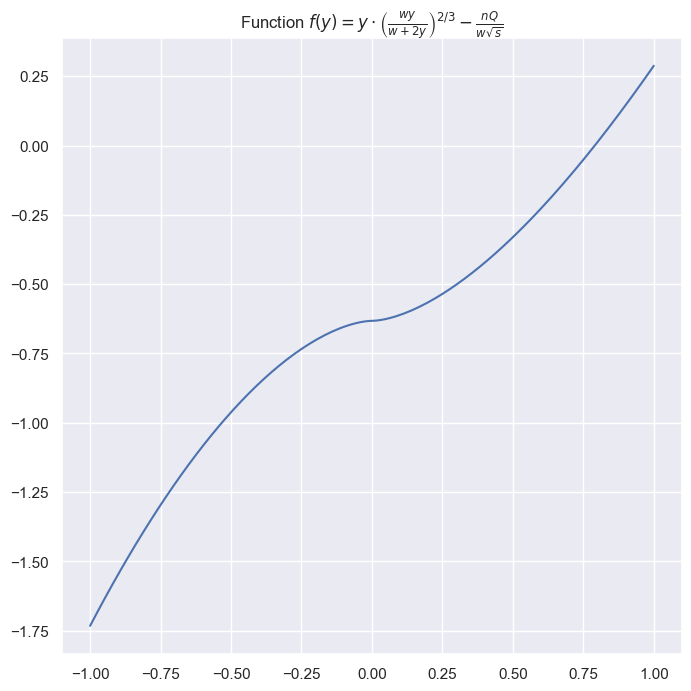

In [7]:
x = np.linspace(-1,1,150)
plt.figure(figsize=(8, 8))
plt.plot(x,functionY(x))
plt.title(r'Function $f(y)=y\cdot\left( \frac{wy}{w+2y} \right) ^{2/3}-\frac{nQ}{w\sqrt{s}}$')
plt.show()

We can see that a root is between zero and one, so $a=0$ and $b=1$. We set the restriction to repeat the process until we find the approximation of the root, with a tolerance in the relative percentage error of $2e-5%$. We verify that the product of $f(a)$ with $f(b)$ is less than zero, since if that condition is not met, it means that $f(a)$ and $f(b)$ have in the same sign. We also calculate the absolute error, the relative error and the percentage relative error.

In [8]:
a = [0]
b = [1]
percentageError = [1]
relativeError = ['NA']
absoluteError = ['NA']
x2 = [a[0]-functionY(a[0])*((b[0]-a[0])/(functionY(b[0])-functionY(a[0])))]
i = 0

while percentageError[i] > 0.00002:

  if functionY(x2[i])*functionY(a[i]) > 0:
    a.append(x2[i])
    b.append(b[i])
  else:
    b.append(x2[i])
    a.append(a[i])

  i += 1
  x2.append(a[i]-functionY(a[i])*((b[i]-a[i])/(functionY(b[i])-functionY(a[i]))))
  absoluteError.append(abs(x2[i]-x2[i-1]))
  relativeError.append((abs(x2[i]-x2[i-1])/abs(x2[i])))
  percentageError.append((abs(x2[i]-x2[i-1])/abs(x2[i]))*100)

percentageError[0] = 'NA'

In [9]:
tabla = {
    'a': a,
    'f(a)': [functionY(a[int(elem)]) for elem in range(0, len(a))],
    'b': b,
    'f(b)': [functionY(b[int(h)]) for h in range(0, len(b))],
    'x2': x2,
    'f(x2)': [functionY(x2[int(p)]) for p in range(0, len(x2))],
    'error absoluto': absoluteError,
    'error relativo': relativeError,
    'error relativo porcentual [%]': percentageError,
}

Tabla = pd.DataFrame(tabla)
Tabla

,a,f(a),b,f(b),x2,f(x2),error absoluto,error relativo,error relativo porcentual [%]
0,0.000000,-6.324555e-01,1,0.287489,0.687493,-1.273436e-01,NA,NA,NA
1,0.687493,-1.273436e-01,1,0.287489,0.783425,-9.347201e-03,0.095932,0.122452,12.245212
2,0.783425,-9.347201e-03,1,0.287489,0.790245,-6.273462e-04,0.00682,0.00863,0.863
3,0.790245,-6.273462e-04,1,0.287489,0.790702,-4.184796e-05,0.000457,0.000578,0.057762
4,0.790702,-4.184796e-05,1,0.287489,0.790732,-2.790382e-06,0.00003,0.000039,0.003852
5,0.790732,-2.790382e-06,1,0.287489,0.790734,-1.860550e-07,0.000002,0.000003,0.000257
6,0.790734,-1.860550e-07,1,0.287489,0.790735,-1.240561e-08,0.0,0.0,0.000017


We can see that after 7 iterations the tolerance was reached with a relative percentage error of $1.71\mathrm{e}{-5}\%$ with the approximate solution of $y=0.790735$ being the latter our approximate solution of the initial equation . Below we can see how the false position is generated in each of the seven iterations.